In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import solve_ivp

In [2]:
def harmonic_oscillator(t, y, omega):
    x, v = y
    return np.array([v, -omega**2 * x])

def damped_harmonic_oscillator(t, y, zeta, omega):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x]

def sm_damper_forcing(t, y, zeta, omega, gamma, alpha):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x + gamma * np.cos(alpha * x)]

def duffing_oscillator(t, y, zeta, omega, beta, gamma, alpha):
    x, v = y
    return [v, -2 * zeta * omega * v - omega**2 * x - beta * x**3 + gamma * np.cos(alpha * x)]

def van_der_pol(t, y, mu):
    x, v = y
    return [v, mu * (1 - x**2) * v - x]

In [3]:
def harmonic_params(rng):
    return {'omega': rng.uniform(2, 6)}

def under_damped_harmonic_params(rng):
    return {'zeta': rng.uniform(0.02, 0.25),
            'omega': rng.uniform(2, 6)}

def spring_mass_forcing_params(rng):
    return {'zeta': rng.uniform(0.02, 0.15),
            'omega': rng.uniform(2, 6),
            'gamma': rng.uniform(1, 3),
            'alpha': rng.uniform(1, 3)}

def duffing_params(rng):
    return {'zeta' : rng.uniform(0.02, 0.15),
            'omega': rng.uniform(1, 3),
            'beta' : rng.uniform(0.5, 1.5),
            'gamma': rng.uniform(0.5, 1.5),
            'alpha': rng.uniform(1, 3)}

def vdp_params(rng):
    return {'mu': rng.uniform(0.5, 2)}

In [4]:
harm_d = 2
damped_harm_d = 2
sm_damp_d = 2
duffing_d = 2
van_der_pol_d = 2

In [12]:
systems = {
    'harmonic_oscillator' : (harmonic_oscillator, harmonic_params, harm_d),
    'under_damped_harmonic_oscillator' : (damped_harmonic_oscillator, under_damped_harmonic_params, damped_harm_d),
    'spring_mass_with_forcing' : (sm_damper_forcing, spring_mass_forcing_params, sm_damp_d),
    'duffing_oscillator' : (duffing_oscillator, duffing_params, duffing_d),
    'van_der_pol_oscillator' : (van_der_pol, vdp_params, van_der_pol_d)
          }

In [13]:
seed = 42
rng = np.random.default_rng(seed)
harmonic_params(rng)

{'omega': 5.095824194223853}

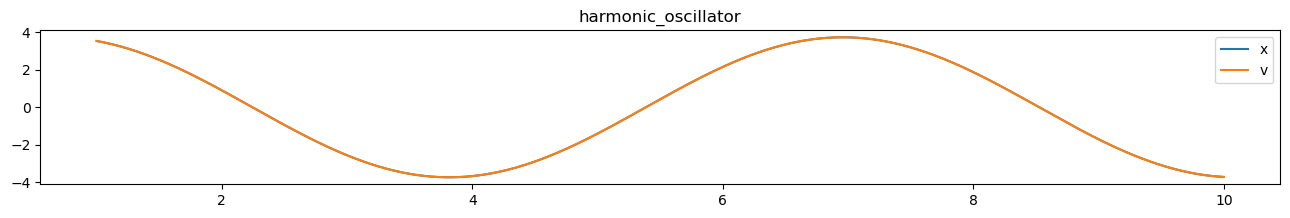

In [30]:
start = 1
end = 10
n = 1000
system = 'harmonic_oscillator'
# harmonic_oscillator, under_damped_harmonic_oscillator
# spring_mass_with_forcing, duffing_oscillator, van_der_pol_oscillator

t_eval = np.linspace(start,end,n)
y0 = [np.random.uniform(-5,5), np.random.uniform(-5,5)]

params = {'omega': 1.0}

ode = systems[system][0]
def wrapped_ode(t,y): return ode(t,y,**params)
sol = solve_ivp(wrapped_ode, [start,end], y0, t_eval=t_eval)

plt.figure(figsize=(16,2))
for i in range(2):
    x = sol.t
    y = sol.y[0,:]
    plt.plot(x,y)

plt.title(system)
plt.legend(['x','v'])
plt.show()